Import necessary sqlite library, creating connection and cursor

In [1]:
import sqlite3
import pandas as pd

connexion = sqlite3.connect("../data/vivino.db")
cursor = connexion.cursor()

Making queries


In [2]:
query1 = """
SELECT
    vintages.wine_id,
    vintages.name,
    keywords.name,
    keywords_wine.count,
    keywords_wine.group_name
FROM
    vintages
    JOIN wines ON vintages.wine_id = wines.id
    JOIN keywords_wine ON wines.id = keywords_wine.wine_id
    JOIN keywords ON keywords_wine.keyword_id = keywords.id
WHERE keywords.name IN ('coffee', 'toast', 'green apple', 'cream', 'citrus') 
    AND keywords_wine.count >= 10
GROUP BY vintages.name
ORDER BY keywords_wine.count DESC
"""

keywords = cursor.execute(query1)

pd_keywords = pd.DataFrame(keywords)
pd_keywords.columns =['wine_id', 'vintages_name', 'keyword', 'keyword_count', 'keyword_group']
display(pd_keywords)
    

,wine_id,vintages_name,keyword,keyword_count,keyword_group
0,86684,Dom Pérignon Brut Champagne 2013,toast,2165,non_oak
1,86684,Dom Pérignon Brut Champagne 2012,toast,2165,non_oak
2,86684,Dom Pérignon Brut Champagne 2006,toast,2165,non_oak
3,86684,Dom Pérignon Brut Champagne 2004,toast,2165,non_oak
4,86684,Dom Pérignon Brut Champagne 2000,toast,2165,non_oak
...,...,...,...,...,...
1200,1213,Avignonesi Vin Santo di Montepulciano 1991,coffee,10,non_oak
1201,1213,Avignonesi Vin Santo di Montepulciano 1989,coffee,10,non_oak
1202,1213,Avignonesi Vin Santo di Montepulciano 1988,coffee,10,non_oak
1203,1213,Avignonesi Vin Santo di Montepulciano 1987,coffee,10,non_oak


Making plots

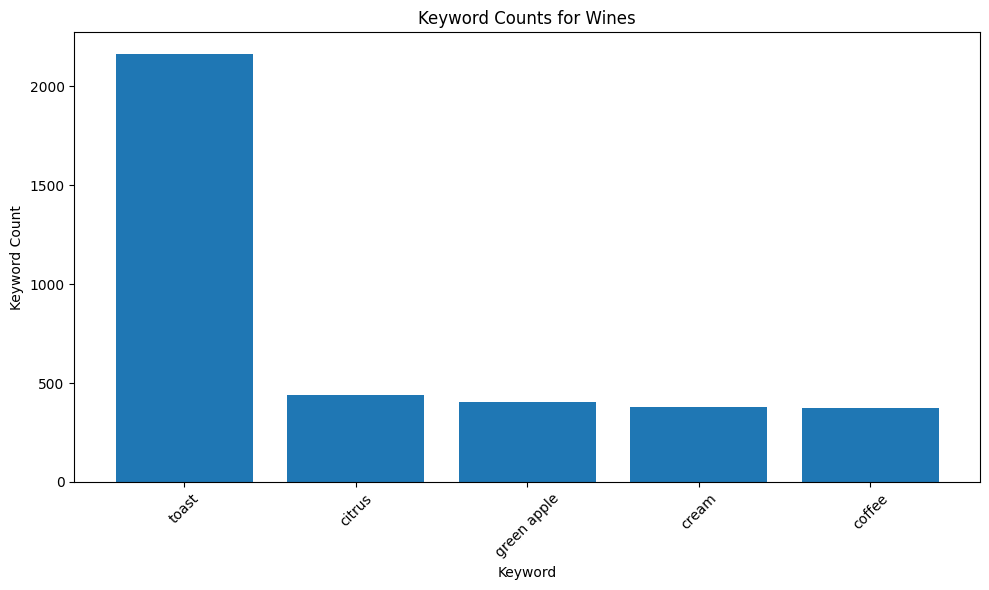

In [3]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.bar(pd_keywords['keyword'], pd_keywords['keyword_count'])
plt.xlabel('Keyword')
plt.ylabel('Keyword Count')
plt.title('Keyword Counts for Wines')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the histogram
plt.show()


Histogram for toast

In [30]:
toast = pd_keywords[pd_keywords['keyword'] == 'toast'].set_index('vintages_name')
display(toast)
toast_top_5 = toast.nlargest(5, 'keyword_count')
display(toast_top_5)

plt.figure(figsize=(10, 6))
plt.bar(toast_top_5['vintages_name'].tolist(), toast_top_5['keyword_count'])
plt.xlabel('Vintage')
plt.ylabel('Keyword Count for "toast"')
plt.title('Keyword Count for "toast" in Top 10 Vintages')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar plot
plt.show()

,wine_id,keyword,keyword_count,keyword_group
vintages_name,,,,
Dom Pérignon Brut Champagne 2013,86684,toast,2165,non_oak
Dom Pérignon Brut Champagne 2012,86684,toast,2165,non_oak
Dom Pérignon Brut Champagne 2006,86684,toast,2165,non_oak
Dom Pérignon Brut Champagne 2004,86684,toast,2165,non_oak
Dom Pérignon Brut Champagne 2000,86684,toast,2165,non_oak
...,...,...,...,...
Paul Launois Single Barrel Champagne Grand Cru 'Le Mesnil-sur-Oger' 2017,9577421,toast,10,non_oak
Casa Ferreirinha Quinta da Leda Douro 2019,75978,toast,10,non_oak
Bodega Contador (Benjamín Romeo) Contador Rioja 2018,98838,toast,10,non_oak


,wine_id,keyword,keyword_count,keyword_group
vintages_name,,,,
Dom Pérignon Brut Champagne 2013,86684,toast,2165,non_oak
Dom Pérignon Brut Champagne 2012,86684,toast,2165,non_oak
Dom Pérignon Brut Champagne 2006,86684,toast,2165,non_oak
Dom Pérignon Brut Champagne 2004,86684,toast,2165,non_oak
Dom Pérignon Brut Champagne 2000,86684,toast,2165,non_oak


KeyError: 'vintages_name'

<Figure size 1000x600 with 0 Axes>

Bar plot citrus

In [25]:


top_5_vintages_citrus = pd_keywords[pd_keywords['keyword'] == 'citrus'].nlargest(5, 'keyword_count')
display(top_5_vintages_toast)

citrus_top_5 = toast[toast['vintages_name'].isin(top_5_vintages_toast['vintages_name'])]
display(toast_top_5)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(toast_top_5.index(), toast_top_5['keyword_count'])
plt.xlabel('Vintage')
plt.ylabel('Keyword Count for "toast"')
plt.title('Keyword Count for "toast" in Top 10 Vintages')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar plot
plt.show()

,wine_id,vintages_name,keyword,keyword_count,keyword_group
0,86684,Dom Pérignon Brut Champagne 2013,toast,2165,non_oak
1,86684,Dom Pérignon Brut Champagne 2012,toast,2165,non_oak
2,86684,Dom Pérignon Brut Champagne 2006,toast,2165,non_oak
3,86684,Dom Pérignon Brut Champagne 2004,toast,2165,non_oak
4,86684,Dom Pérignon Brut Champagne 2000,toast,2165,non_oak


KeyError: 'vintages_name'